# Let's begin by including a few useful libraries

In [4]:
import csv
import matplotlib
import matplotlib.pyplot as plt

# Now it's time to import our data. Don't worry *too* much about the specifics here- this code just describes how I chose to organize the data

In [37]:
iris_dataset_file = open("iris.csv",'r')
dataset_reader = csv.reader(iris_dataset_file, delimiter=',')
iris_inputs = []
iris_outputs = []
iris_labels = []
for row in dataset_reader:
    if len(row) < 4:
        break
    for i in range(len(row)-1):
        row[i] = float(row[i])
    iris_inputs.append(row[0:4])
    if row[4] == 'Iris-setosa':
        iris_outputs.append(0)
    elif row[4] == 'Iris-versicolor':
        iris_outputs.append(1)
    elif row[4] == 'Iris-virginica':
        iris_outputs.append(2)
    iris_labels.append(row[4])

# It's always useful to visualize the data you're working with

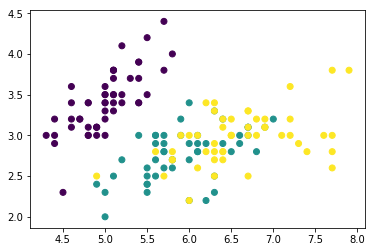

In [45]:
x1_data, x2_data = list(zip(*iris_inputs))[0], list(zip(*iris_inputs))[1]
plt.scatter(x1_data, x2_data, c=iris_outputs)
plt.show()
#purple- setosa, green- versicolor, yellow- virginica

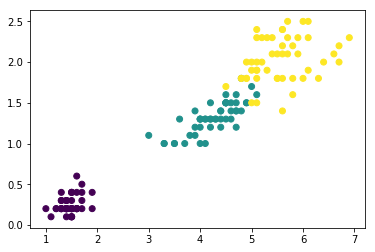

In [43]:
x1_data, x2_data = list(zip(*iris_inputs))[2], list(zip(*iris_inputs))[3]
plt.scatter(x1_data, x2_data, c=iris_outputs)
plt.show()

In [8]:
print(iris_inputs)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [9]:
print(iris_outputs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Time to do some ML, let's import Keras. Keras is a great library for quickly creating and training Neural Networks in Python

In [10]:
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(10, input_dim=4, kernel_initializer="uniform",activation="relu"))
model.add(Dense(3))
model.add(Activation("softmax"))
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [12]:
for i in range(len(iris_outputs)):
    if iris_outputs[i] == 0:
        iris_outputs[i] = [1,0,0]
    elif iris_outputs[i] == 1:
        iris_outputs[i] = [0,1,0]
    elif iris_outputs[i] == 2:
        iris_outputs[i] = [0,0,1]

In [18]:
import numpy as np

In [22]:
model.fit(np.array(iris_inputs), np.array(iris_outputs), epochs=50, batch_size=5, verbose=1)

Epoch 1/50
150/150 [==============================] - 0s 872us/step - loss: 0.5831 - acc: 0.6889
Epoch 2/50
150/150 [==============================] - 0s 156us/step - loss: 0.5147 - acc: 0.7578
Epoch 3/50
150/150 [==============================] - 0s 156us/step - loss: 0.4527 - acc: 0.8333
Epoch 4/50
150/150 [==============================] - 0s 146us/step - loss: 0.4150 - acc: 0.8533
Epoch 5/50
150/150 [==============================] - 0s 158us/step - loss: 0.3902 - acc: 0.8422
Epoch 6/50
150/150 [==============================] - 0s 166us/step - loss: 0.3636 - acc: 0.8467
Epoch 7/50
150/150 [==============================] - 0s 144us/step - loss: 0.3443 - acc: 0.8533
Epoch 8/50
150/150 [==============================] - 0s 166us/step - loss: 0.3274 - acc: 0.8600
Epoch 9/50
150/150 [==============================] - 0s 152us/step - loss: 0.3140 - acc: 0.8844
Epoch 10/50
150/150 [==============================] - 0s 157us/step - loss: 0.2993 - acc: 0.8933
Epoch 11/50
150/150 [========

In [33]:
def predict_iris(input):
    p = np.argmax(model.predict(np.array([input])))
    if p == 0:
        return "Iris-setosa"
    elif p == 1:
        return "Iris-versicolor"
    elif p == 2:
        return "Iris-virginica"

In [47]:
predict_iris([7, 3, 6, 2])

'Iris-virginica'